.. meta::
    :description:  An implementation of a progressivly interactive NSGA-II algorithm that uses user preference to guide the solving of multi-objective optimization problems. Value function optimization is used to take user generated ranking of key points to model user's preferences.

.. meta::
    :keywords: PINSGA2, PINSGA-II, Progressivly Interactive, Multi-objective Optimization, Python

# PI-NSGA-II: Progressivly Interactive NSGA-II

PI-NSGA-II (PINSGA2) is an implementation of PI-EMO-VF <cite data-cite="piemovf"></cite> for the NSGA-II algorithm. It interactively employs user preferences to guide the multi-objective optimization process using a custom domination operator. 

At regular intervals ($\tau$ generations), the algorithm pauses to select $\eta$ well-spaced points from the current Pareto front. These points are presented to the decision-maker, who ranks them based on personal preference. The ranking can be either pairwise, where solutions are compared in pairs to establish a relative preference order, or absolute where solutions are ranked from highest to lowest preference. Ranking can either be made by a human decision maker via the command line, or automatically with a programmed automatic decision maker. 

The user-provided rankings are then used to fit a value function that models the decision maker's preferences. This value function modifies the domination of points for the next $\tau$ generations, and then the process is repeated.


### Example

This is a simple example with a custom automatedDM. This example uses ZDT3, since its disconnected Pareto-optimal front illustrates how the algorithm guides the optimization through the objective space. The decision maker is set to rank four points ($\eta$) every ten generations ($\tau$) based on their distance from the center of the second region of the solution. In this case imagine the decision maker only wants one or more solutions in this area of the search space, and the other solutions are undisireable.

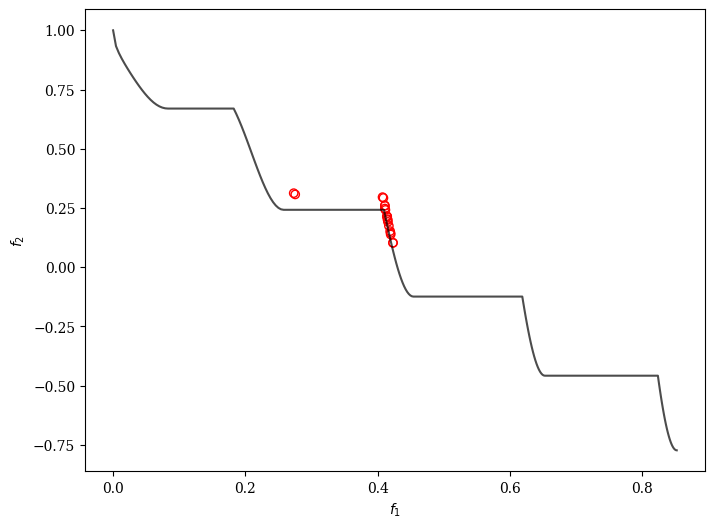

In [2]:
from pymoo.algorithms.moo.pinsga2 import PINSGA2, AutomatedDM
from pymoo.problems import get_problem
from pymoo.optimize import minimize
import numpy as np
from pymoo.visualization.scatter import Scatter

class simpleDM( AutomatedDM ):
    
    def makeDecision(self, F): 
        # Euclidean distance from center of region # 2
        distances = np.sqrt( ( F[:, 0] - 0.21999557 )**2 + ( 0.40167775 - F[:, 1] )**2 )  

        if distances[0] < distances[1]:
            out = 'a'
        elif distances[1] < distances[0]:
            out = 'b'
        else:
            out = 'c'
        
        return out

simple_dm = simpleDM()

problem = get_problem("zdt3")

algorithm = PINSGA2(pop_size=30, 
                    tau=10,
                    eta=4,
                    opt_method="trust-constr", 
                    vf_type="poly",
                    ranking_type="pairwise",
                    automated_dm=simple_dm)

res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

### Parameters


| Name                         | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | Parameter        | Possible values                                                                                                                                                                                                                                                                                                                                                                                                               |
| ---------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| $\tau$                       | Number of generations between each stakeholder prompt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | `tau`            | $1 < \tau$ (default of 10)                                                                                                                                                                                                                                                                                                                                                                                                    |
| $\eta$                       | Number of points for the decision maker to rank each $\tau$ generations                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               | `eta`            | $2<\eta$ (default of 4)                                                                                                                                                                                                                                                                                                                                                                                                       |
| Optimization method          | The optimization method used to fit the value function                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                | `opt_method`     | <ul><br>  <li ><code class="docutils literal notranslate"><span class="pre">trust-constr</span></code> (default)</li><br>  <li ><code class="docutils literal notranslate"><span class="pre">SLSQP</span></code></li><br>  <li ><code class="docutils literal notranslate"><span class="pre">ES</span></code></li><br>  <li ><code class="docutils literal notranslate"><span class="pre">GA</span></code> </li><br></ul><br> |
| Value function type          | The mathematical format of your value function                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | `vf_type`        | <ul><br>  <li ><code class="docutils literal notranslate"><span class="pre">poly</span></code> (default) A polynomial representation of user preference</li><br>  <li ><code class="docutils literal notranslate"><span class="pre">linear</span></code> A linear representation of user preference</li><br></ul><br>                                                                                                         |
| Ranking method               | The method of eliciting preference from the stakeholder                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               | `ranking_method` | <ul><br>  <li ><code class="docutils literal notranslate"><span class="pre">pairwise</span></code> (default) User only compares two solutions at a time</li><br>  <li ><code class="docutils literal notranslate"><span class="pre">absolute</span></code> - User must provide a complete ranking</li><br></ul>                                                                                                               |
| Automated ranking (optional) | Whether to have a real human rank solutions or an automated decision maker. <ul><br><li>If<code class="docutils literal notranslate"><span class="pre">ranking_method == 'absolute'</span></code>, makeDecision will recieve eta pts and must return a complete ranking of those points</li><br><li>If <code class="docutils literal notranslate"><span class="pre">ranking_method == 'pairwise'</span></code>, makeDecision will recieve pairs of points and must return 'a' if the first point is better, 'b' if the second point is better, or 'c' if they are equally good.</li><br></ul><br><br> | `automated_dm`   | A class that implements the `automatedDM` class.                                                                                                                                                                                                                                                                                                                                                                              |



### API